### 新增雲端

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 路徑

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# 指定 Parquet 檔案的路徑
train_source_file_path = '/content/drive/MyDrive/Datagame-2023/data/label_train_source.parquet'
test_source_file_path = '/content/drive/MyDrive/Datagame-2023/data/label_test_source.parquet'
meta_song_file_path = '/content/drive/MyDrive/Datagame-2023/data/meta_song.parquet'
song_composer_file_path = '/content/drive/MyDrive/Datagame-2023/data/meta_song_composer.parquet'
song_genre_file_path = '/content/drive/MyDrive/Datagame-2023/data/meta_song_genre.parquet'
song_lyricist_file_path = '/content/drive/MyDrive/Datagame-2023/data/meta_song_lyricist.parquet'
song_producer_file_path = '/content/drive/MyDrive/Datagame-2023/data/meta_song_producer.parquet'
song_titletext_file_path = '/content/drive/MyDrive/Datagame-2023/data/meta_song_titletext.parquet'

### 判斷所有檔案是否含有缺失值

meta song 有None值
```python
# 使用 Pandas 讀取 Parquet 檔案
train_df = pd.read_parquet(train_source_file_path)
test_df = pd.read_parquet(test_source_file_path)
meta_song = pd.read_parquet(meta_song_file_path)
song_composer = pd.read_parquet(song_composer_file_path)
song_genre = pd.read_parquet(song_genre_file_path)
song_lyricist = pd.read_parquet(song_lyricist_file_path)
song_producer = pd.read_parquet(song_producer_file_path)
song_titletext = pd.read_parquet(song_titletext_file_path)

# 確認是否有缺失值
missing_values_train = train_df.isnull().sum()
missing_values_test = test_df.isnull().sum()
missing_values_meta_song = meta_song.isnull().sum()
str_columns_test = song_composer.select_dtypes(include='object').columns
song_composer = song_composer[str_columns_test].astype(str).isnull().sum()
str_columns_test = song_genre.select_dtypes(include='object').columns
song_genre = song_genre[str_columns_test].astype(str).isnull().sum()
str_columns_test = d.select_dtypes(include='object').columns
d = d[str_columns_test].astype(str).isnull().sum()
str_columns_test = e.select_dtypes(include='object').columns
e = e[str_columns_test].astype(str).isnull().sum()
str_columns_test = f.select_dtypes(include='object').columns
f = f[str_columns_test].astype(str).isnull().sum()

# 顯示結果
print("Missing values in train_df:")
print(missing_values_train)
print("\nMissing values in test_df:")
print(missing_values_test)
print("\nMissing values in meta song:")
print(missing_values_meta_song)
print()
print(song_composer)
print()
print(c)
print()
print(d)
print()
print(e)
print()
print(f)
print()
```
---
Missing values in train_df:
session_id         0
song_id            0
unix_played_at     0
play_status        0
login_type         0
listening_order    0
dtype: int64

Missing values in test_df:
session_id         0
song_id            0
unix_played_at     0
play_status        0
login_type         0
listening_order    0
dtype: int64

Missing values in meta song:
song_id             0
artist_id      128866
song_length    128866
album_id       323497
language_id    323497
album_month    323523
dtype: int64

song_id        0
album_month    0
dtype: int64

song_id        0
composer_id    0
dtype: int64

song_id     0
genre_id    0
dtype: int64

song_id        0
lyricist_id    0
dtype: int64

song_id        0
producer_id    0
dtype: int64

song_id          0
title_text_id    0
dtype: int64


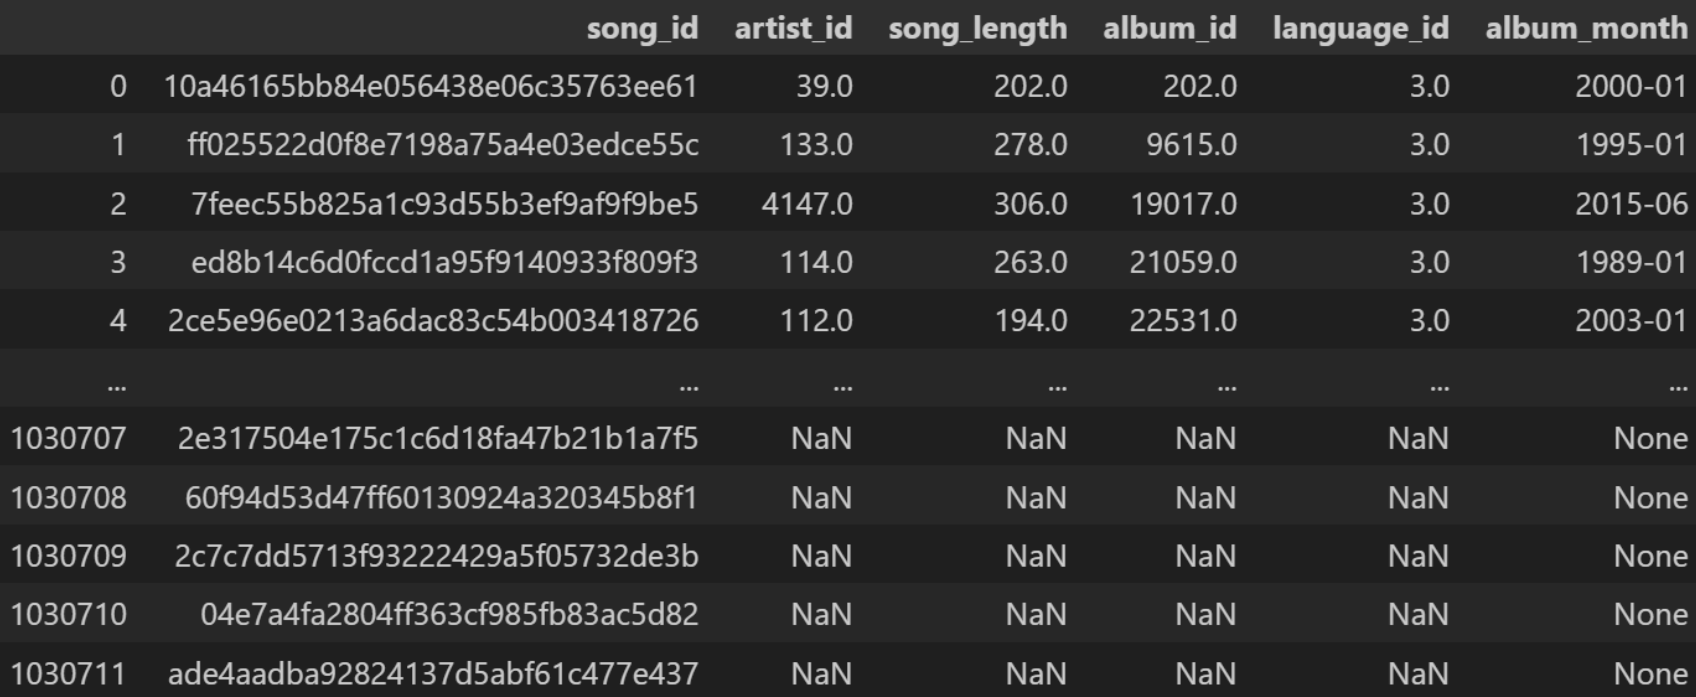

### 把unix_played_at換成看得懂的日期時間

In [3]:
pd.set_option('display.max_rows', 200)
train_df = pd.read_parquet(train_source_file_path)
train_df = train_df[:]
train_df.insert(train_df.columns.get_loc('unix_played_at') + 1, 'date', pd.to_datetime(train_df['unix_played_at'], unit='s'))

### 重複的比較 ###

#### 20首歌有重複的占比有多少

*例:  
4首重複，其餘16首都不同，為4;  
3首同歌曲重複，4首同歌曲重複，其餘13首都不同，為7

##### 第一種畫法

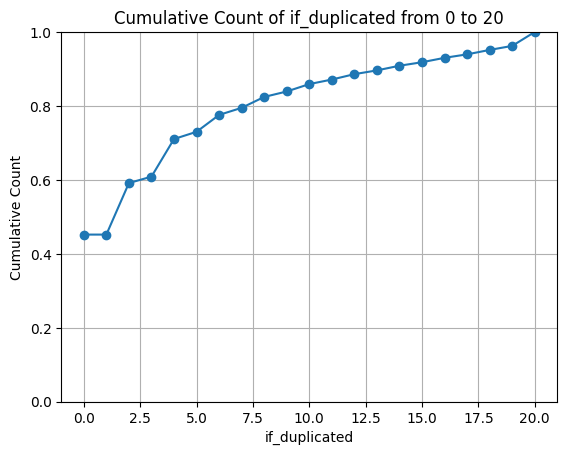

In [4]:
train_df['if_duplicated'] = train_df.duplicated(subset=['song_id', 'session_id'], keep=False).astype(int)
session_id_counts = train_df.groupby('session_id')['if_duplicated'].sum().reset_index()
count_by_if_duplicated = session_id_counts['if_duplicated'].value_counts().sort_index()
result_dict = dict(count_by_if_duplicated)

total = sum(result_dict.values())
cumulative_dict = {}
cumulative_count = 0
for i in range(21):
    cumulative_count += count_by_if_duplicated.get(i, 0)
    cumulative_dict[i] = cumulative_count / total #佔總體佔比

plt.plot(cumulative_dict.keys(), cumulative_dict.values(), marker='o')
plt.xlabel('if_duplicated')
plt.ylabel('Cumulative Count')
plt.title('Cumulative Count of if_duplicated from 0 to 20')
plt.grid(True)
plt.ylim(0, 1.0)
plt.show()



##### 第二種畫法

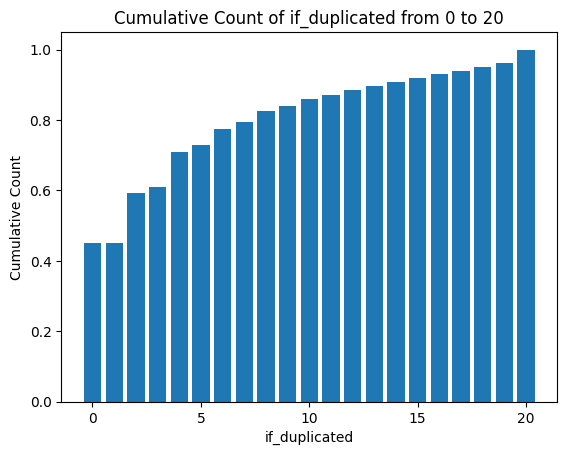

In [6]:
session_id_counts = train_df.groupby('session_id')['if_duplicated'].sum().reset_index()
count_by_if_duplicated = session_id_counts['if_duplicated'].value_counts().sort_index()
result_dict = dict(count_by_if_duplicated)

total = sum(result_dict.values())
cumulative_dict = {}
cumulative_count = 0
for i in range(21):
    cumulative_count += count_by_if_duplicated.get(i, 0)
    cumulative_dict[i] = cumulative_count / total #佔總體佔比

# 绘制累计直方图
plt.bar(cumulative_dict.keys(), cumulative_dict.values())
plt.xlabel('if_duplicated')
plt.ylabel('Cumulative Count')
plt.title('Cumulative Count of if_duplicated from 0 to 20')
plt.show()


#### 聽的總專輯數對應的百分比人數 / Artist排名由大到小的占比累積百分比

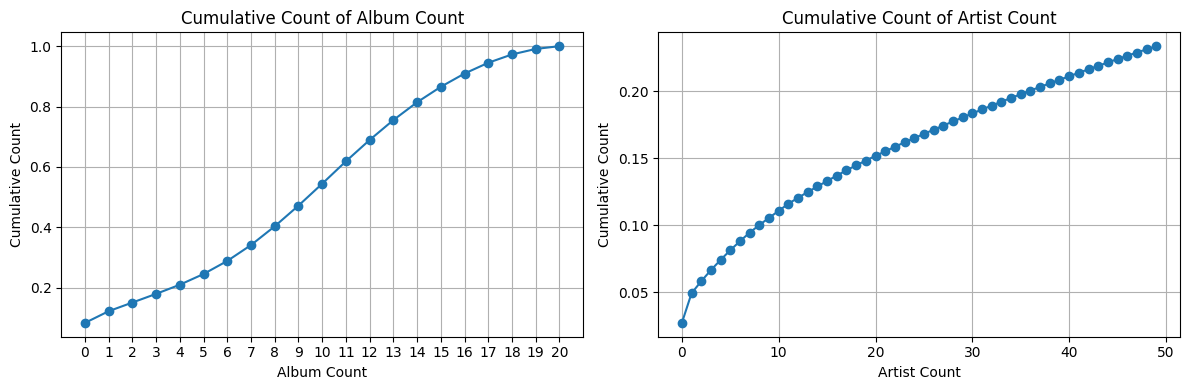

In [7]:
filtered_session_ids = session_id_counts[session_id_counts['if_duplicated'] >=0]['session_id']
meta_song = pd.read_parquet(meta_song_file_path)
# 合并train_df和meta_song，以获取album_id
merged_df = pd.merge(train_df, meta_song, on='song_id', how='left')
del meta_song
# 从合并后的DataFrame中过滤出对应的session_id的数据
filtered_merged_df = merged_df[merged_df['session_id'].isin(filtered_session_ids)]
del filtered_session_ids
del merged_df
# 查看这些session_id听的song_id对应的不同的album_id数量
session_to_album_count = filtered_merged_df.groupby('session_id')['album_id'].nunique()

album_count = session_to_album_count.sort_values().value_counts().sort_index()
artist_count = filtered_merged_df['artist_id'].sort_values().value_counts()

# 计算累积值
cumulative_album_count = album_count.cumsum()
cumulative_artist_count = artist_count.cumsum()

album_total = album_count.sum()
artist_total = artist_count.sum()

# 百分比
cumulative_album_count = cumulative_album_count.div(album_total)
cumulative_artist_count = cumulative_artist_count.div(artist_total).head(50).reset_index()

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(cumulative_album_count.index, cumulative_album_count.values, marker='o')
plt.xlabel('Album Count')
plt.ylabel('Cumulative Count')
plt.title('Cumulative Count of Album Count')
plt.xticks(cumulative_album_count.index.astype(int)) #設為整數
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(cumulative_artist_count['artist_id'].index, cumulative_artist_count['artist_id'].values, marker='o')
plt.xlabel('Artist Count')
plt.ylabel('Cumulative Count')
plt.title('Cumulative Count of Artist Count')
plt.grid(True)

plt.tight_layout()
plt.show()

#### 【重複歌曲為15以上的人】
#### 聽的總專輯數對應的百分比人數 / Artist排名由大到小的占比累積百分比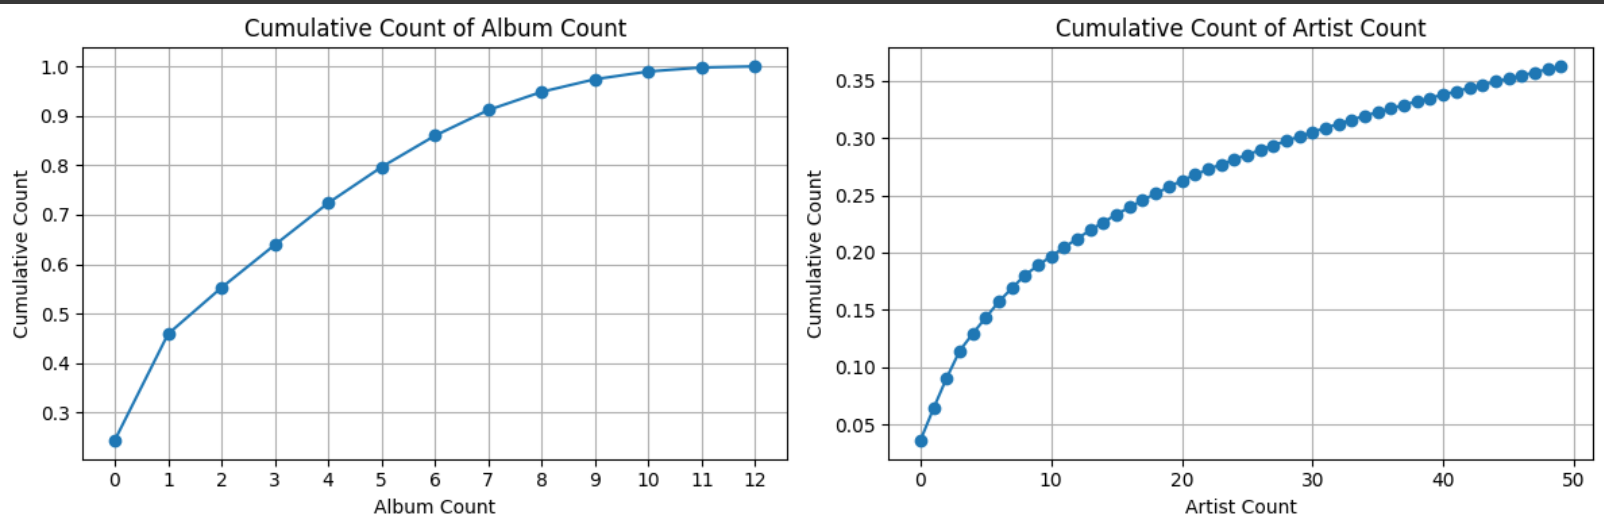

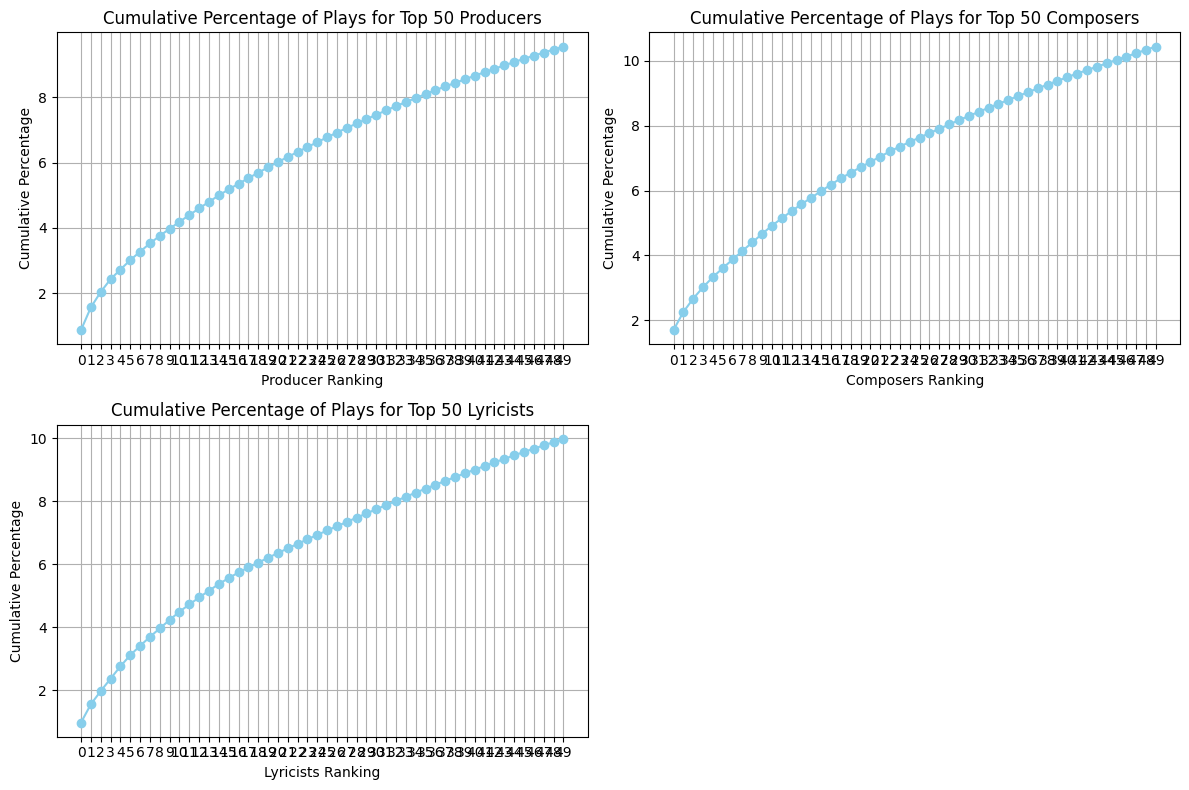

In [9]:
filtered_session_ids = session_id_counts[session_id_counts['if_duplicated'] <=5]['session_id']
filtered_train_df = train_df[train_df['session_id'].isin(filtered_session_ids)]
song_producer = pd.read_parquet(song_producer_file_path)
merged_df = pd.merge(filtered_train_df, song_producer, on='song_id', how='left')
del song_producer

producer_counts = merged_df['producer_id'].value_counts()

# 計算每個 song_id 出現的百分比
song_percentages = producer_counts.sort_values(ascending=False) / len(merged_df) * 100
# 創建一個包含2個子圖的 figure

song_cumulative_percentages = song_percentages.cumsum()
top_50_song_ids = song_cumulative_percentages.head(50)
plt.figure(figsize=(12,8))

plt.subplot(2, 2, 1)
plt.plot(range(50), top_50_song_ids, marker='o', linestyle='-', color='skyblue')
plt.title('Cumulative Percentage of Plays for Top 50 Producers')
plt.xlabel('Producer Ranking')
plt.ylabel('Cumulative Percentage')
plt.xticks(range(50))
plt.grid(True)

#################################################################################################
meta_song = pd.read_parquet(meta_song_file_path)
# 合并train_df和meta_song，以获取album_id
merged_df = pd.merge(filtered_train_df, meta_song, on='song_id', how='left')
del meta_song

song_composer = pd.read_parquet(song_composer_file_path)
merged_df = pd.merge(train_df, song_composer, on='song_id', how='left')
del song_composer
counts = merged_df['composer_id'].value_counts()

# 計算每個 song_id 出現的百分比
percentages = counts.sort_values(ascending=False) / len(merged_df) * 100
# 創建一個包含2個子圖的 figure

cumulative_percentages = percentages.cumsum()
top_50 = cumulative_percentages.head(50)

plt.subplot(2, 2, 2)
plt.plot(range(50), top_50, marker='o', linestyle='-', color='skyblue')
plt.title('Cumulative Percentage of Plays for Top 50 Composers')
plt.xlabel('Composers Ranking')
plt.ylabel('Cumulative Percentage')
plt.xticks(range(50))
plt.grid(True)

#################################################################################################
song_lyricist = pd.read_parquet(song_lyricist_file_path)
# 合并train_df和meta_song，以获取album_id
merged_df = pd.merge(filtered_train_df, song_lyricist, on='song_id', how='left')
del song_lyricist

counts = merged_df['lyricist_id'].value_counts()

# 計算每個 song_id 出現的百分比
percentages = counts.sort_values(ascending=False) / len(merged_df) * 100
# 創建一個包含2個子圖的 figure

cumulative_percentages = percentages.cumsum()
top_50 = cumulative_percentages.head(50)

plt.subplot(2, 2, 3)
plt.plot(range(50), top_50, marker='o', linestyle='-', color='skyblue')
plt.title('Cumulative Percentage of Plays for Top 50 Lyricists')
plt.xlabel('Lyricists Ranking')
plt.ylabel('Cumulative Percentage')
plt.xticks(range(50))
plt.grid(True)

plt.tight_layout()
plt.show()

In [27]:

# 篩選出時間差大於7天的歌曲，並且 if_duplicated 為 1
result = train_df[(train_df['time_difference'] > pd.Timedelta(days=7)) & (train_df['if_duplicated'] == 1)]['song_id']

print(len(result) / len(train_df[(train_df['if_duplicated']==1)]))

0.001141386114982504


In [28]:
len(result) / len(train_df[(train_df['if_duplicated']==1)])

0.0009521495821026566

In [15]:
train_df[train_df['song_id']=='ff1907fc67f9d20b496ef7d431fdae8e'].sort_values(by='session_id')

,session_id,song_id,unix_played_at,date,play_status,login_type,listening_order,if_duplicated,time_difference
3236800,1612,ff1907fc67f9d20b496ef7d431fdae8e,1660666152,2022-08-16 16:09:12,1,46,17,0,NaT
8793935,6920,ff1907fc67f9d20b496ef7d431fdae8e,1665971035,2022-10-17 01:43:55,3,46,11,0,NaT
9312601,108151,ff1907fc67f9d20b496ef7d431fdae8e,1660142964,2022-08-10 14:49:24,2,0,17,1,NaT
9312602,108151,ff1907fc67f9d20b496ef7d431fdae8e,1660208299,2022-08-11 08:58:19,2,0,18,1,0 days 18:08:55
1658635,108161,ff1907fc67f9d20b496ef7d431fdae8e,1666317991,2022-10-21 02:06:31,2,7,16,0,NaT
1771426,109626,ff1907fc67f9d20b496ef7d431fdae8e,1664013113,2022-09-24 09:51:53,1,7,7,0,NaT
8710882,110003,ff1907fc67f9d20b496ef7d431fdae8e,1662639381,2022-09-08 12:16:21,2,7,18,1,0 days 00:31:32
8710872,110003,ff1907fc67f9d20b496ef7d431fdae8e,1662636743,2022-09-08 11:32:23,2,7,8,1,NaT
8710875,110003,ff1907fc67f9d20b496ef7d431fdae8e,1662637489,2022-09-08 11:44:49,2,7,11,1,0 days 00:12:26
7066639,111993,ff1907fc67f9d20b496ef7d431fdae8e,1662994076,2022-09-12 14:47:56,1,8,5,0,NaT


In [10]:
train_df

,session_id,song_id,unix_played_at,date,play_status,login_type,listening_order,if_duplicated
0,751,6027767fad949f3ca5e772df04924949,1659598909,2022-08-04 07:41:49,1,7,1,1
1,751,041547bddb0a3e730f32db84c65868ca,1659599182,2022-08-04 07:46:22,1,7,2,1
2,751,041547bddb0a3e730f32db84c65868ca,1659599184,2022-08-04 07:46:24,0,7,3,1
3,751,041547bddb0a3e730f32db84c65868ca,1659599185,2022-08-04 07:46:25,0,7,4,1
4,751,8b32f88104ecf859be934d9b45f30cd1,1659599218,2022-08-04 07:46:58,1,7,5,1
...,...,...,...,...,...,...,...,...
11445175,458622,3ba8c1e455e27172edec64deff3a8b15,1662339887,2022-09-05 01:04:47,2,7,16,1
11445176,458622,3ba8c1e455e27172edec64deff3a8b15,1662340090,2022-09-05 01:08:10,2,7,17,1
11445177,458622,3ba8c1e455e27172edec64deff3a8b15,1662340294,2022-09-05 01:11:34,2,7,18,1
11445178,458622,3ba8c1e455e27172edec64deff3a8b15,1662340497,2022-09-05 01:14:57,2,7,19,1


### 計算前50首歌跟其他attribute之間的關係 ###

#### 排名的producer跟composer對應的累積百分比人數

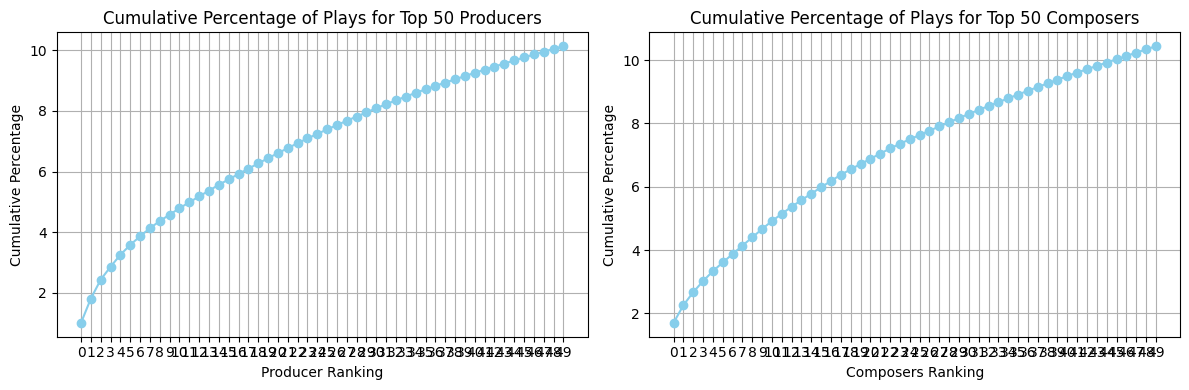

In [69]:
song_producer = pd.read_parquet(song_producer_file_path)
merged_df = pd.merge(train_df, song_producer, on='song_id', how='left')
del song_producer
producer_counts = merged_df['producer_id'].value_counts()

# 計算每個 song_id 出現的百分比
song_percentages = producer_counts.sort_values(ascending=False) / len(merged_df) * 100
# 創建一個包含2個子圖的 figure

song_cumulative_percentages = song_percentages.cumsum()
top_50_song_ids = song_cumulative_percentages.head(50)
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(range(50), top_50_song_ids, marker='o', linestyle='-', color='skyblue')
plt.title('Cumulative Percentage of Plays for Top 50 Producers')
plt.xlabel('Producer Ranking')
plt.ylabel('Cumulative Percentage')
plt.xticks(range(50))
plt.grid(True)

#################################################################################################
song_composer = pd.read_parquet(song_composer_file_path)
merged_df = pd.merge(train_df, song_composer, on='song_id', how='left')
del song_composer
counts = merged_df['composer_id'].value_counts()

# 計算每個 song_id 出現的百分比
percentages = counts.sort_values(ascending=False) / len(merged_df) * 100
# 創建一個包含2個子圖的 figure

cumulative_percentages = percentages.cumsum()
top_50 = cumulative_percentages.head(50)

plt.subplot(1, 2, 2)
plt.plot(range(50), top_50, marker='o', linestyle='-', color='skyblue')
plt.title('Cumulative Percentage of Plays for Top 50 Composers')
plt.xlabel('Composers Ranking')
plt.ylabel('Cumulative Percentage')
plt.xticks(range(50))
plt.grid(True)


plt.tight_layout()
plt.show()

#### 排名的attribute對應的累積百分比人數

In [ ]:

# song_composer = pd.read_parquet(song_composer_file_path)
# train_df = pd.merge(train_df, song_composer, on='song_id', how='left')
# del song_composer

train_df = pd.read_parquet(train_source_file_path)
song_producer = pd.read_parquet(song_producer_file_path)
train_df = pd.merge(train_df, song_producer, on='song_id', how='left')
del song_producer

train_df = pd.read_parquet(train_source_file_path)
song_titletext = pd.read_parquet(song_titletext_file_path)
train_df = pd.merge(train_df, song_titletext, on='song_id', how='left')
del song_titletext

train_df = pd.read_parquet(train_source_file_path)
meta_song = pd.read_parquet(meta_song_file_path)
train_df = pd.merge(train_df, meta_song, on='song_id', how='left')
del meta_song

song_producer = pd.read_parquet(song_producer_file_path)
train_df = pd.merge(train_df, song_producer, on='song_id', how='left')
del song_producer

song_titletext = pd.read_parquet(song_titletext_file_path)
train_df = pd.merge(train_df, song_titletext, on='song_id', how='left')
del song_titletext

meta_song = pd.read_parquet(meta_song_file_path)
train_df = pd.merge(train_df, meta_song, on='song_id', how='left')
del meta_song

#### song_id ###

In [ ]:
# 計算每個 song_id 的出現次數
song_counts = train_df['song_id'].value_counts()

# 計算每個 song_id 出現的百分比
song_percentages = song_counts.sort_values(ascending=False) / len(train_df) * 100
top_10_song_ids = song_percentages.head(50)
# 取前5個字母作為顯示名稱
song_labels = top_10_song_ids.index.str[:2]
# 創建一個包含2個子圖的 figure
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# 第一個子圖 - 直方圖
axs[0].bar(range(50), top_10_song_ids, color='skyblue')
axs[0].set_title('Percentage of Plays for Top 50 Songs')
axs[0].set_xlabel('Song ID')
axs[0].set_ylabel('Percentage')
axs[0].set_xticks(range(50))
axs[0].set_xticklabels(song_labels, rotation=45, ha='right')

song_cumulative_percentages = song_percentages.cumsum()
top_10_song_ids = song_cumulative_percentages.head(50)
# 第二個子圖 - 累加圖
axs[1].plot(range(50), top_10_song_ids, marker='o', linestyle='-', color='skyblue')
axs[1].set_title('Cumulative Percentage of Plays for Top 50 Songs')
axs[1].set_xlabel('Song ID')
axs[1].set_ylabel('Cumulative Percentage')
axs[1].set_xticks(range(50))
axs[1].set_xticklabels(song_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### song_genre ####

In [ ]:
train_df = pd.read_parquet(train_source_file_path)
song_genre = pd.read_parquet(song_genre_file_path)
train_df = pd.merge(train_df, song_genre, on='song_id', how='left')
del song_genre
song_counts = train_df['song_genre'].value_counts()

# 計算每個 song_id 出現的百分比
song_percentages = song_counts.sort_values(ascending=False) / len(train_df) * 100
top_10_song_ids = song_percentages.head(50)
# 取前5個字母作為顯示名稱
song_labels = top_10_song_ids.index.str[:2]
# 創建一個包含2個子圖的 figure
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# 第一個子圖 - 直方圖
axs[0].bar(range(50), top_10_song_ids, color='skyblue')
axs[0].set_title('Percentage of Plays for Top 50 Songs')
axs[0].set_xlabel('Song ID')
axs[0].set_ylabel('Percentage')
axs[0].set_xticks(range(50))
axs[0].set_xticklabels(song_labels, rotation=45, ha='right')

song_cumulative_percentages = song_percentages.cumsum()
top_10_song_ids = song_cumulative_percentages.head(50)
# 第二個子圖 - 累加圖
axs[1].plot(range(50), top_10_song_ids, marker='o', linestyle='-', color='skyblue')
axs[1].set_title('Cumulative Percentage of Plays for Top 50 Songs')
axs[1].set_xlabel('Song ID')
axs[1].set_ylabel('Cumulative Percentage')
axs[1].set_xticks(range(50))
axs[1].set_xticklabels(song_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()

KeyError: ignored

#### song_lyricist ####

In [ ]:
train_df = pd.read_parquet(train_source_file_path)
song_lyricist = pd.read_parquet(song_lyricist_file_path)
train_df = pd.merge(train_df, song_lyricist, on='song_id', how='left')
del song_lyricist
song_counts = train_df['song_lyricist'].value_counts()

# 計算每個 song_id 出現的百分比
song_percentages = song_counts.sort_values(ascending=False) / len(train_df) * 100
top_10_song_ids = song_percentages.head(50)
# 取前5個字母作為顯示名稱
song_labels = top_10_song_ids.index.str[:2]
# 創建一個包含2個子圖的 figure
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# 第一個子圖 - 直方圖
axs[0].bar(range(50), top_10_song_ids, color='skyblue')
axs[0].set_title('Percentage of Plays for Top 50 Songs')
axs[0].set_xlabel('Song ID')
axs[0].set_ylabel('Percentage')
axs[0].set_xticks(range(50))
axs[0].set_xticklabels(song_labels, rotation=45, ha='right')

song_cumulative_percentages = song_percentages.cumsum()
top_10_song_ids = song_cumulative_percentages.head(50)
# 第二個子圖 - 累加圖
axs[1].plot(range(50), top_10_song_ids, marker='o', linestyle='-', color='skyblue')
axs[1].set_title('Cumulative Percentage of Plays for Top 50 Songs')
axs[1].set_xlabel('Song ID')
axs[1].set_ylabel('Cumulative Percentage')
axs[1].set_xticks(range(50))
axs[1].set_xticklabels(song_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### song_producer ####

In [ ]:
song_counts = train_df['song_producer'].value_counts()

# 計算每個 song_id 出現的百分比
song_percentages = song_counts.sort_values(ascending=False) / len(train_df) * 100
top_10_song_ids = song_percentages.head(50)
# 取前5個字母作為顯示名稱
song_labels = top_10_song_ids.index.str[:2]
# 創建一個包含2個子圖的 figure
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# 第一個子圖 - 直方圖
axs[0].bar(range(50), top_10_song_ids, color='skyblue')
axs[0].set_title('Percentage of Plays for Top 50 Songs')
axs[0].set_xlabel('Song ID')
axs[0].set_ylabel('Percentage')
axs[0].set_xticks(range(50))
axs[0].set_xticklabels(song_labels, rotation=45, ha='right')

song_cumulative_percentages = song_percentages.cumsum()
top_10_song_ids = song_cumulative_percentages.head(50)
# 第二個子圖 - 累加圖
axs[1].plot(range(50), top_10_song_ids, marker='o', linestyle='-', color='skyblue')
axs[1].set_title('Cumulative Percentage of Plays for Top 50 Songs')
axs[1].set_xlabel('Song ID')
axs[1].set_ylabel('Cumulative Percentage')
axs[1].set_xticks(range(50))
axs[1].set_xticklabels(song_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### song_titletext ####

In [ ]:
song_counts = train_df['song_titletext'].value_counts()

# 計算每個 song_id 出現的百分比
song_percentages = song_counts.sort_values(ascending=False) / len(train_df) * 100
top_10_song_ids = song_percentages.head(50)
# 取前5個字母作為顯示名稱
song_labels = top_10_song_ids.index.str[:2]
# 創建一個包含2個子圖的 figure
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# 第一個子圖 - 直方圖
axs[0].bar(range(50), top_10_song_ids, color='skyblue')
axs[0].set_title('Percentage of Plays for Top 50 Songs')
axs[0].set_xlabel('Song ID')
axs[0].set_ylabel('Percentage')
axs[0].set_xticks(range(50))
axs[0].set_xticklabels(song_labels, rotation=45, ha='right')

song_cumulative_percentages = song_percentages.cumsum()
top_10_song_ids = song_cumulative_percentages.head(50)
# 第二個子圖 - 累加圖
axs[1].plot(range(50), top_10_song_ids, marker='o', linestyle='-', color='skyblue')
axs[1].set_title('Cumulative Percentage of Plays for Top 50 Songs')
axs[1].set_xlabel('Song ID')
axs[1].set_ylabel('Cumulative Percentage')
axs[1].set_xticks(range(50))
axs[1].set_xticklabels(song_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()

### 確認train跟test是否有重複的session_id ###



In [ ]:
train_df = pd.read_parquet(train_source_file_path)
test_df = pd.read_parquet(test_source_file_path)

# 確認 train_df 和 test_df 中的 session_id 是否有重複
duplicate_sessions = set(train_df['session_id']) & set(test_df['session_id'])

# 顯示結果
if duplicate_sessions:
    print(f"Duplicate sessions between train_df and test_df: {duplicate_sessions}")
else:
    print("No duplicate sessions between train_df and test_df")


No duplicate sessions between train_df and test_df


### [重複的歌曲] & [play_status]的關係 ###

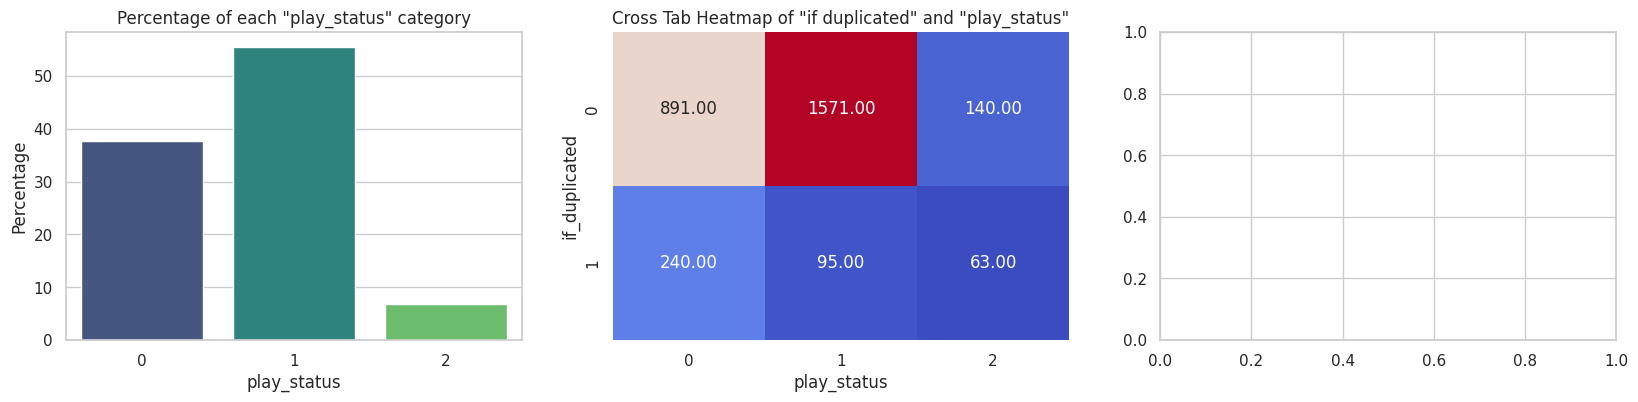

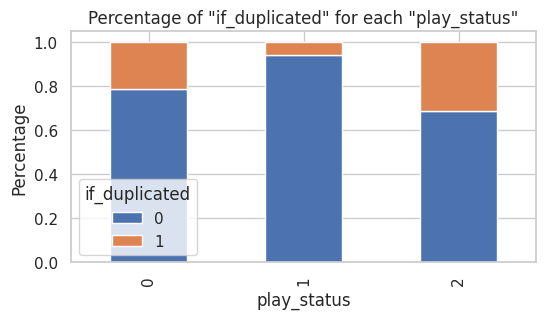

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 設定 Seaborn 樣式
sns.set(style="whitegrid")

# 計算每個 play_status 的百分比
percentages = train_df['play_status'].value_counts(normalize=True) * 100
train_df['if_duplicated'] = train_df.duplicated(subset=['song_id', 'session_id'], keep=False).astype(int)

# 繪製百分比條形圖
plt.figure(figsize=(20, 4))

# 第一個 subplot - 百分比條形圖
plt.subplot(1, 3, 1)
sns.barplot(x=percentages.index, y=percentages.values, palette='viridis')
plt.title('Percentage of each "play_status" category')
plt.xlabel('play_status')
plt.ylabel('Percentage')

# 第二個 subplot - 熱圖
plt.subplot(1, 3, 2)
cross_tab = pd.crosstab(train_df['if_duplicated'], train_df['play_status'])
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)  # 設置 cbar 為 False
plt.title('Cross Tab Heatmap of "if duplicated" and "play_status"')

# 第三個 subplot - 堆疊條形圖
plt.subplot(1, 3, 3)
grouped_counts = train_df.groupby(['play_status', 'if_duplicated']).size().unstack(fill_value=0)
grouped_percentages = grouped_counts.div(grouped_counts.sum(axis=1), axis=0)
grouped_percentages.plot(kind='bar', stacked=True, figsize=(6, 3))
plt.title('Percentage of "if_duplicated" for each "play_status"')
plt.xlabel('play_status')
plt.ylabel('Percentage')
plt.show()



### login_type跟play_status關係 ###

NameError: ignored

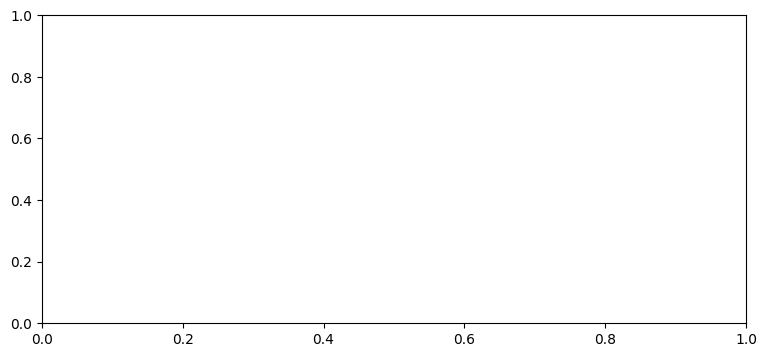

In [ ]:
plt.figure(figsize=(20, 4))


percentages = train_df['login_type'].value_counts(normalize=True) * 100
# 第一個 subplot - 百分比條形圖
plt.subplot(1, 2, 1)
sns.barplot(x=percentages.index, y=percentages.values, palette='viridis')
plt.title('Percentage of each "login_type" category')
plt.xlabel('play_status')
plt.ylabel('Percentage')

# 第三個 subplot - 堆疊條形圖
plt.subplot(1, 2, 2)
grouped_counts = train_df.groupby(['login_type', 'if_duplicated']).size().unstack(fill_value=0)
grouped_percentages = grouped_counts.div(grouped_counts.sum(axis=1), axis=0)
grouped_percentages.plot(kind='bar', stacked=True, figsize=(6, 3))
plt.title('Percentage of "if duplicated" for each "play_status"')
plt.xlabel('play_status')
plt.ylabel('Percentage')
plt.show()